In [1]:
from environment import Environment
from collections import defaultdict
from agent.base_agent import RandomAgent
from agent.td_agent import QLearningAgent
from agent.td_agent import ExpectedSarsaAgent
from trainer import TwoPlayerGameTrainer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Game parameter
SECTION = 3
MAX_CHOCOLATE = 20
MIN_CHOCOLATE = 3

# Setting up the game environment and trainer
env = Environment(SECTION=SECTION, MAX_CHOCOLATE=MAX_CHOCOLATE, MIN_CHOCOLATE=MIN_CHOCOLATE)
trainer = TwoPlayerGameTrainer()

In [3]:
agent1 = QLearningAgent(alpha=0.05, epsilon=0.4, discount=1)

In [4]:
agent1, win_rates = TwoPlayerGameTrainer.self_play(env, agent1, n_games=20000, iteration=30)


Iteration 0
Running game: 20000
Done!
Winning rate: 0.74355

Iteration 1
Running game: 20000
Done!
Winning rate: 0.61675

Iteration 2
Running game: 20000
Done!
Winning rate: 0.5302

Iteration 3
Running game: 20000
Done!
Winning rate: 0.48705

Iteration 4
Running game: 20000
Done!
Winning rate: 0.4698

Iteration 5
Running game: 20000
Done!
Winning rate: 0.4037

Iteration 6
Running game: 20000
Done!
Winning rate: 0.3606

Iteration 7
Running game: 20000
Done!
Winning rate: 0.3407

Iteration 8
Running game: 20000
Done!
Winning rate: 0.30135

Iteration 9
Running game: 20000
Done!
Winning rate: 0.2722

Iteration 10
Running game: 20000
Done!
Winning rate: 0.2584

Iteration 11
Running game: 20000
Done!
Winning rate: 0.25755

Iteration 12
Running game: 20000
Done!
Winning rate: 0.2115

Iteration 13
Running game: 20000
Done!
Winning rate: 0.1791

Iteration 14
Running game: 20000
Done!
Winning rate: 0.19535

Iteration 15
Running game: 20000
Done!
Winning rate: 0.18745

Iteration 16
Running game:

In [5]:
agent1.save_model(os.path.join("model", "qagent_self_play_3_3_20.npy"))

In [6]:
# agent1 = QLearningAgent(0.05, 0.3, 1)
# agent1.load_model(os.path.join("model", "qagent_self_play_3_3_20.npy"))

agent2 = QLearningAgent(0.05, 0.3, 1)
agent2.load_model(os.path.join("model", "qagent_vs_qagent_3_3_20.npy"))

agent3 = QLearningAgent(0.05, 0.3, 1)
agent3.load_model(os.path.join("model", "qagent_vs_random_3_3_20.npy"))

In [7]:
trainer.play(env, agent1, agent2)


----------------------------------------------------------------


Chocolate box:

Box 1: 18
Box 2: 16
Box 3: 11

Player 1: take 15 chocolates from box 1...

----------------------------------------------------------------


Chocolate box:

Box 1: 3
Box 2: 16
Box 3: 11

Player 2: take 1 chocolates from box 1...

----------------------------------------------------------------


Chocolate box:

Box 1: 2
Box 2: 16
Box 3: 11

Player 1: take 2 chocolates from box 2...

----------------------------------------------------------------


Chocolate box:

Box 1: 2
Box 2: 14
Box 3: 11

Player 2: take 1 chocolates from box 1...

----------------------------------------------------------------


Chocolate box:

Box 1: 1
Box 2: 14
Box 3: 11

Player 1: take 4 chocolates from box 2...

----------------------------------------------------------------


Chocolate box:

Box 1: 1
Box 2: 10
Box 3: 11

Player 2: take 10 chocolates from box 2...

------------------------------------------------------------

In [8]:
# Agent 1 (self_play) vs agent 2 (qagent_vs_qagent)
history, n_win = trainer.play_and_train(env=env, agent1=agent1, agent2=agent2, n_games = 20000, learn=False)

Running game: 20000
Done!


In [9]:
cum_history = np.cumsum(history)

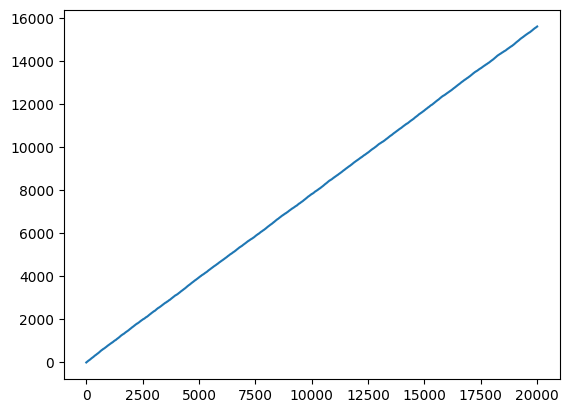

In [10]:
plt.plot(cum_history)
plt.show()

/Users/kelvinchristian/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


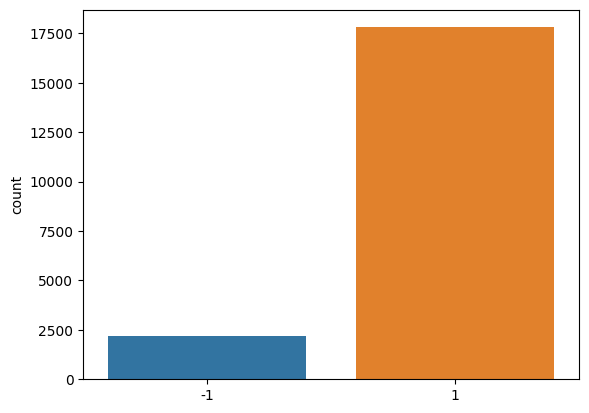

In [11]:
sns.countplot(history)
plt.show()

In [12]:
print(f"Winning rate: {n_win}")

Winning rate: 0.8906
